In [1]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
import mysql.connector as mysqlConnector
import sqlite3
import pandas as pd

connexion = mysql.connector.connect(host='127.0.0.1',
                        user='root',
                        password='bienmalacquisneprofitejamais1!',
                        database='CREDITS')
if connexion:
    print("Connexion à la base de données CREDITS réussie")
else:
    print("Connexion échouée")

Connexion à la base de données CREDITS réussie


In [2]:
query1 = 'SELECT CLIENT.cible, CREDIT.montant_accordé FROM CLIENT INNER JOIN CREDIT ON CLIENT.id_client = CREDIT.montant_accordé'
df=pd.read_sql(query1,connexion)
df

,cible,montant_accordé
0,0,123486
1,0,134955
2,0,113827
3,0,135000
4,0,110457
...,...,...
246598,0,337500
246599,0,100795
246600,0,111388
246601,0,241848


In [3]:
# On crée une fonction pour tracer des "countplots" répétitifs en analyse univariée sur df
# Cette fonction est divisée en deux sous-parcelles :
# 1. Comptage de la colonne catégorielle par rapport à la cible ;
# 2. Pourcentage de défaillants dans la colonne

def univariee(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Nombre de contrats': temp.values})

    # On calcule le pourcentage de cible=1 par valeur de catégorie
    cat_perc = df[[feature, 'cible']].groupby([feature],as_index=False).mean()
    cat_perc["cible"] = cat_perc["cible"]*100
    cat_perc.sort_values(by='cible', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
        
    # 1. Sous-parcelle 1 : courbe de comptage de la colonne 
    # sns.set_palette("Set2")
    
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="cible",
                    order=cat_perc[feature],
                    palette=['blue','orange'])
    
    
    # Définir un style commun

    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['En règle','Défectueux'])
    
    # Si le tracé n'est pas lisible, utilisez l'échelle logarithmique.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Compte (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    
    # 2. Sous-parcelle 2 : Pourcentage de défaillants dans la colonne 
    s = sns.barplot(ax=ax2, 
                   
                    x = feature, 
                    y='cible', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Pourcentage de défectueux [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Défectueux %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [4]:
# On crée des catégories de montants demandés.

#slots = ['100000-150000','150000-200000','200000-300000']
#bins = [100000,150000,200000,300000]
#df['montant_demande']=pd.cut(df['montant_demande'],bins,labels=slots)
# On vérifie le défaut de paiement en fonction du montant accordé. 
#univariee('montant_demande',True,True,True)

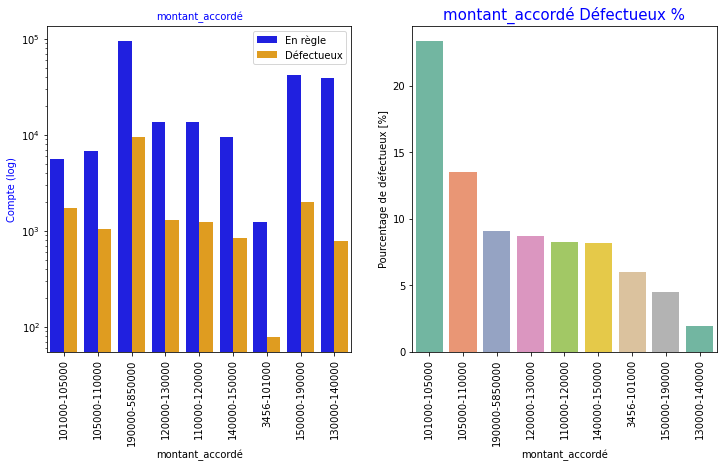

In [5]:
#On crée des catégories de montants accordés.

slots = ['3456-101000','101000-105000','105000-110000','110000-120000','120000-130000','130000-140000','140000-150000','150000-190000','190000-5850000']
bins = [3456,101000,105000,110000,120000,130000,140000,150000,190000,5850000]
df['montant_accordé']=pd.cut(df['montant_accordé'],bins,labels=slots)
# On vérifie le défaut de paiement en fonction du montant accordé. 
univariee('montant_accordé',True,True,True)

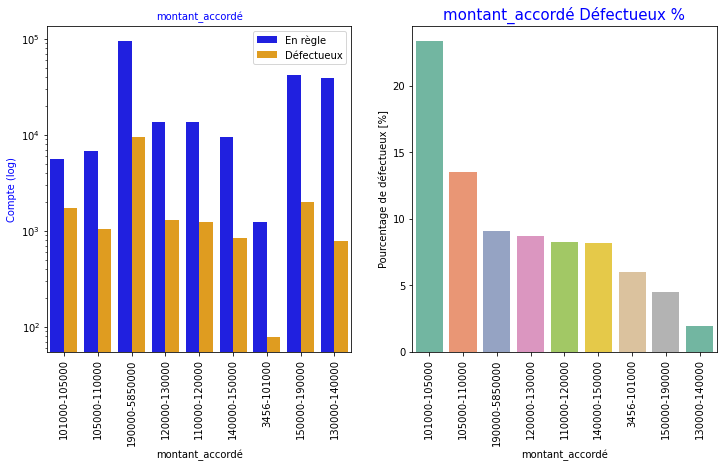

In [8]:
univariee('montant_accordé',True,True,True)
# 0 = XNA  1 = Vêtements et accessoirs 2 = Maison
# 3 = Audio, vidéo 4 = Bijoux 5 = Articles ménagers
# 6 = Meubles 7 = Electronic 8 = Médical 9 = Loisirs

In [7]:
connexion.close()